# Weather data analysis

Intro

Let's start with importing usefull libraries and modules

In [1]:
import requests #make a get request to a web server                                                                                                                            
from bs4 import BeautifulSoup #parse the page                                                                                                                                  
from geopy.geocoders import Nominatim #get coordinates of locations                                                                                                            
from math import sin, cos, sqrt, atan2, radians, pi # math stuff                                                                                                               
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import datetime as dt
import matplotlib.dates as mdates
import webbrowser
from datetime import datetime
import sys


In [2]:
def month_string_to_number(string):
    m = {
        'Gennaio': 1,
        'Febbraio': 2,
        'Marzo': 3,
        'Aprile':4,
        'Maggio':5,
        'Giugno':6,
        'Luglio':7,
        'Agosto':8,
        'Settembre':9,
        'Ottobre':10,
        'Novembre':11,
        'Dicembre':12
        }
    try:
        return m[string]
    except:
        raise ValueError('Not a month')

In [3]:
data = {
    'day' : [],
    'year' : [],
    'month' : [],
    'Av_Temp' : [],
    'Min_Temp' : [],
    'Max_Temp' : [],
    'Rain' : [],
    'Humidity' : [],
    'Av_Wind' : [],
    'RainyDay' : [],
    'SnowDay' :[],
    'StormDay' :[],
    'FoggyDay' :[],
    }


In [4]:
Months = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']

In [5]:
for ye in range(1997,2017):
    for m in Months:      # Number of pages plus one                                                                                                                           
        url = "https://www.ilmeteo.it/portale/archivio-meteo/Palermo/{}/{}?refresh_cens".format(ye,m)
        #print (url)
        page =  requests.get(url)
        soup = BeautifulSoup(page.content,'html.parser')
        all_tables = soup.find_all("table")
        for row in soup('table')[4].findAll('tr'):
            Info=[]
            cells = row.findAll('td')
            for i in cells:
                Info.append(i.find(text=True))
            if len(Info) > 0 :
                Av_Temp = Info[0][:-2]
                Min_Temp = Info[1][:-2]
                Max_Temp = Info[2][:-2]
                Rain = Info[3][:-2]
                Humidity = Info[4][:-1]
                Av_Wind = Info[5][:-4]
                RainyDay = Info[6]
                SnowDay = Info[7]
                StormDay = Info[8]
                FoggyDay = Info[9]
                data['day'].append(1)
                data['year'].append(str(ye))
                data['month'].append(month_string_to_number(m))
                data['Av_Temp'].append(Av_Temp)
                data['Min_Temp'].append(Min_Temp)
                data['Max_Temp'].append(Max_Temp)
                data['Rain'].append(Rain)
                data['Humidity'].append(Humidity)
                data['Av_Wind'].append(Av_Wind)
                data['RainyDay'].append(RainyDay)
                data['SnowDay'].append(SnowDay)
                data['StormDay'].append(StormDay)
                data['FoggyDay'].append(FoggyDay)
                df = pd.DataFrame(data)


In [6]:
df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')
df['day'] = df['day'].astype('int')
df['day'] = df.apply(lambda row: datetime(row['year'], row['month'],row['day']), axis=1)
#df.day = pd.to_datetime(df.day).dt.strftime('%m/%Y')



In [7]:
df

,Av_Temp,Av_Wind,FoggyDay,Humidity,Max_Temp,Min_Temp,Rain,RainyDay,SnowDay,StormDay,day,month,year
0,13.7,12.6,0,73.8,16.6,10.8,70.36,8,0,1,1997-01-01,1,1997
1,12.5,13.3,0,73.1,15.7,9.4,8.38,5,0,2,1997-02-01,2,1997
2,13.2,14.4,0,72.6,16.8,9.5,22.35,6,0,1,1997-03-01,3,1997
3,14.4,16.1,0,68.6,17.7,11.1,15.5,10,0,2,1997-04-01,4,1997
4,19.9,11.2,0,70.3,24.3,15.9,6.1,4,0,1,1997-05-01,5,1997
5,24.2,12.8,1,73.9,28.5,20.5,1.02,1,0,0,1997-06-01,6,1997
6,25.4,14.6,0,76.5,29.3,21.9,n,0,0,0,1997-07-01,7,1997
7,26.1,11,0,78.2,29.6,22.3,64.01,6,0,3,1997-08-01,8,1997
8,23.4,12.2,0,83.3,26.8,19.9,87.12,12,0,3,1997-09-01,9,1997
9,20.6,16.3,0,81.7,23.6,17.6,67.81,13,0,3,1997-10-01,10,1997


In [8]:
df['Av_Temp'] = df['Av_Temp'].astype('float')
df['Av_Wind'] = df['Av_Wind'].astype('float')
df['FoggyDay'] = df['FoggyDay'].astype('int')
df['Humidity'] = df['Humidity'].astype('float')
df['Max_Temp'] = df['Max_Temp'].astype('float')
df['Min_Temp'] = df['Min_Temp'].astype('float')
df['RainyDay'] = df['RainyDay'].astype('int')
df['SnowDay'] = df['SnowDay'].astype('int')
df['StormDay'] = df['StormDay'].astype('int')
mask = df['Rain'] == 'n'
column_name = 'Rain'
df.loc[mask, column_name] = np.nan

df['Rain'] = df['Rain'].astype('float')
#df['day'] = pd.to_datetime(df['day'])



In [9]:
df.drop('month', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

In [10]:
df2 = df

In [11]:
print (df2.dtypes)

Av_Temp            float64
Av_Wind            float64
FoggyDay             int64
Humidity           float64
Max_Temp           float64
Min_Temp           float64
Rain               float64
RainyDay             int64
SnowDay              int64
StormDay             int64
day         datetime64[ns]
dtype: object


In [12]:
df2.describe()

,Av_Temp,Av_Wind,FoggyDay,Humidity,Max_Temp,Min_Temp,Rain,RainyDay,SnowDay,StormDay
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,131.000000,240.000000,240.000000,240.000000
mean,18.852917,15.026667,0.100000,70.325833,21.951667,15.583333,74.704046,8.879167,0.120833,2.358333
std,5.124393,3.532189,0.385946,5.168597,5.344884,4.971834,141.077834,5.839376,0.406515,2.239978
min,10.300000,7.400000,0.000000,50.600000,12.800000,7.300000,0.250000,0.000000,0.000000,0.000000
25%,13.900000,12.800000,0.000000,67.450000,16.800000,11.000000,9.275000,4.000000,0.000000,0.000000
50%,18.500000,14.600000,0.000000,70.150000,21.400000,15.400000,27.690000,9.000000,0.000000,2.000000
75%,23.525000,16.925000,0.000000,73.900000,26.825000,20.125000,62.480000,13.000000,0.000000,4.000000
max,27.800000,25.000000,3.000000,83.300000,31.500000,24.300000,824.740000,24.000000,2.000000,10.000000


In [20]:
import seaborn as sns

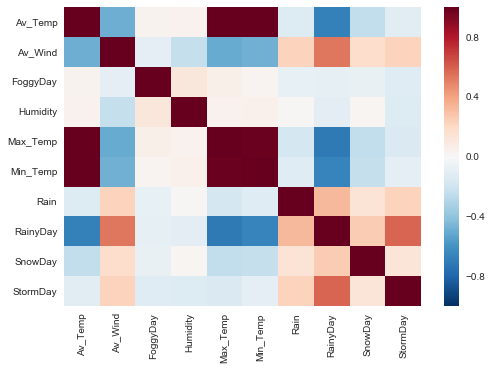

In [21]:
sns.heatmap(data=df2.corr())
plt.show()
plt.gcf().clear()

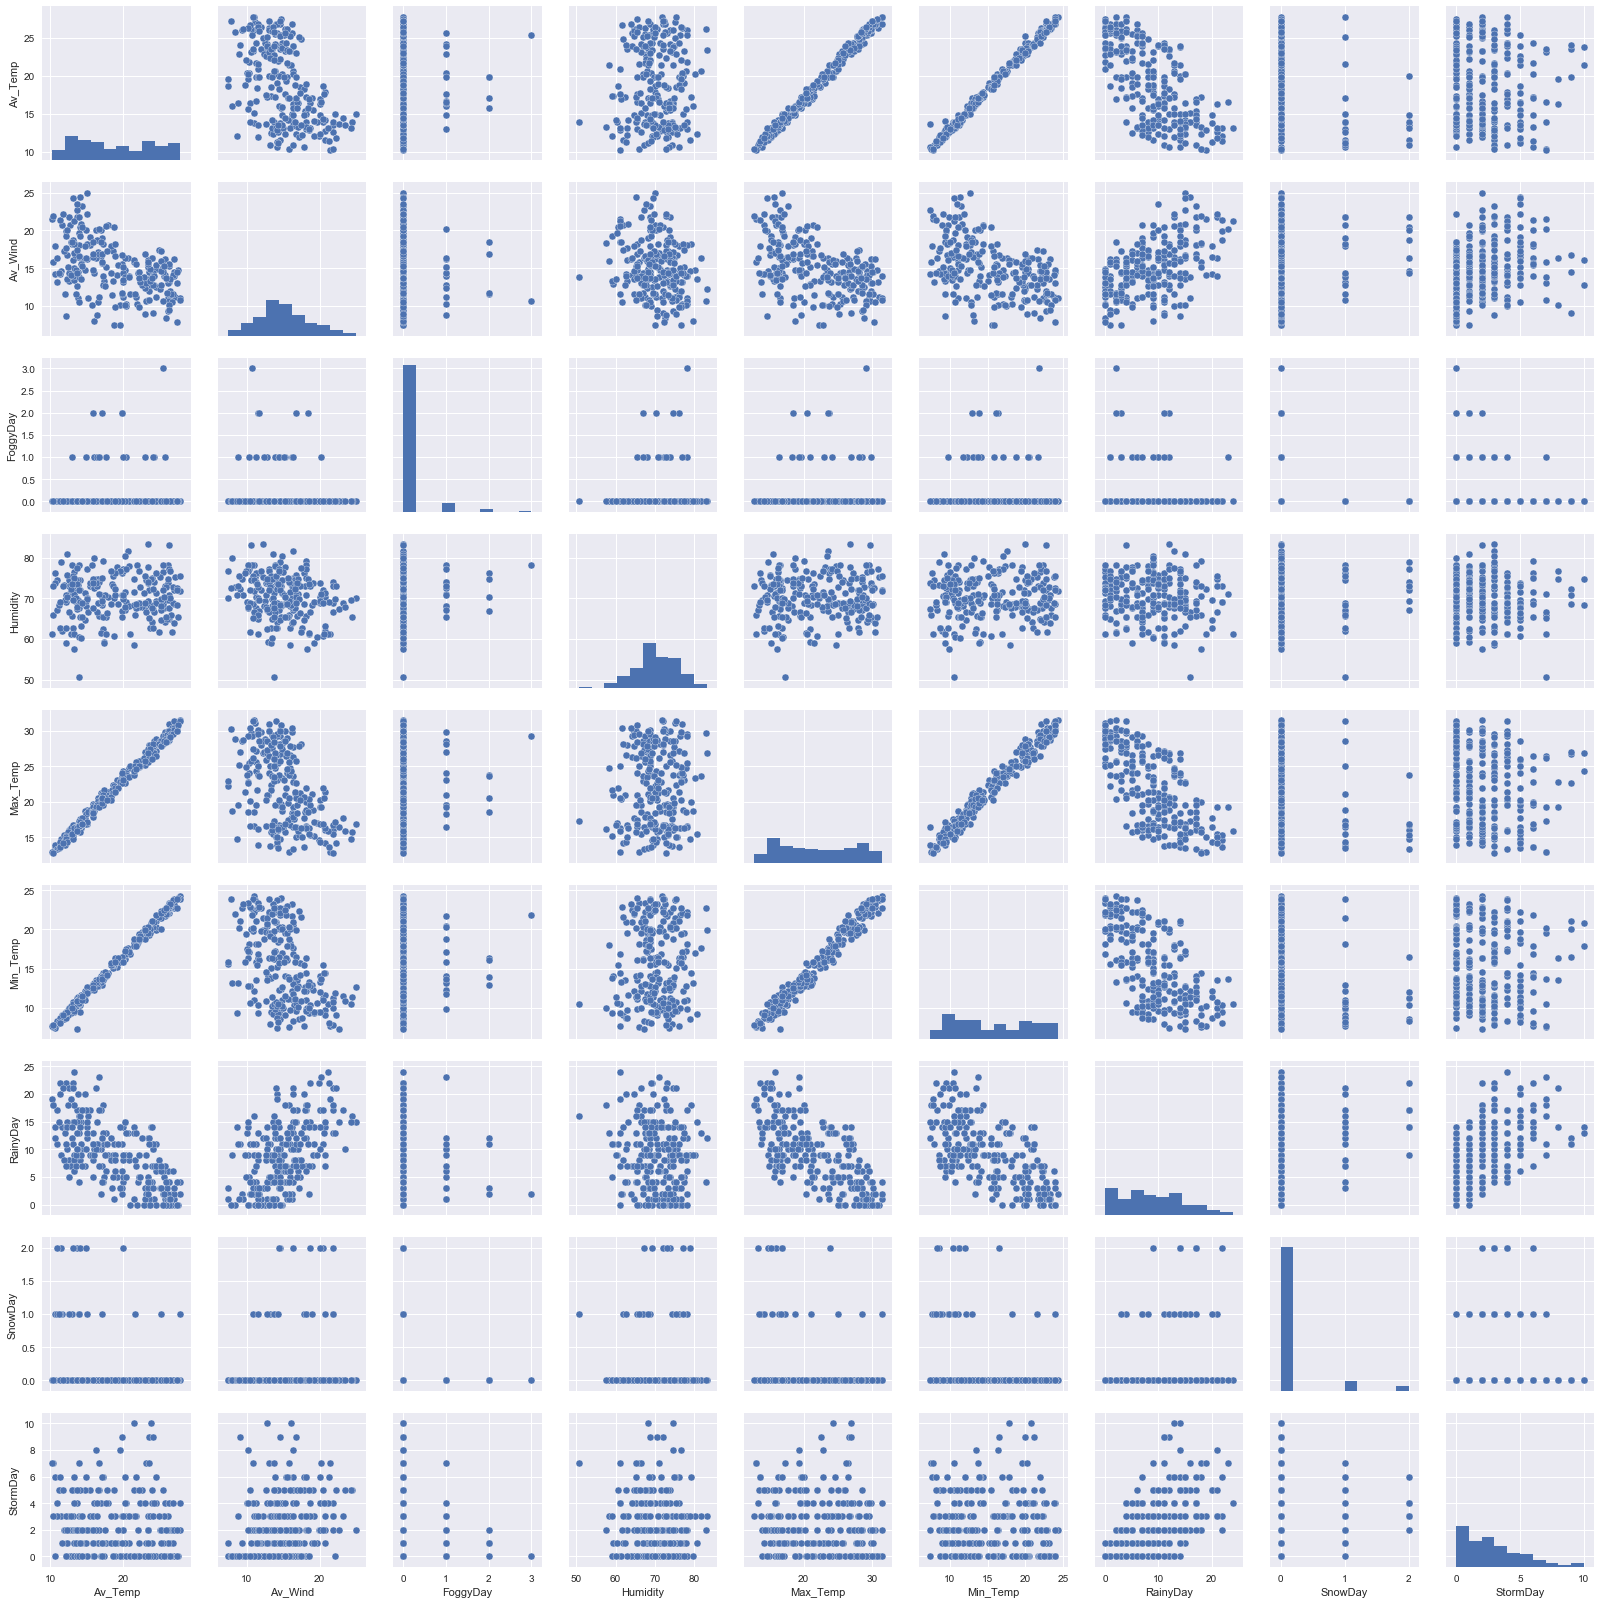

In [22]:
#scatterplot
sns.set()
cols = ['Av_Temp', 'Av_Wind', 'FoggyDay', 'Humidity', 'Max_Temp', 'Min_Temp', 'RainyDay', 'SnowDay', 'StormDay']
sns.pairplot(df2[cols], size = 2.5)
plt.show()

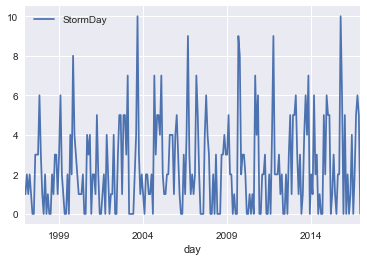

In [23]:
%matplotlib inline
df2.plot(x='day',y='StormDay')

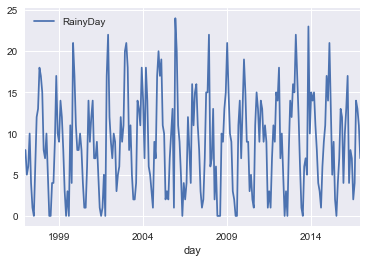

In [27]:
df2.plot(x='day',y='RainyDay' )